# Atividade 01 - Parte 01

Aluna: Bianca Bonetti Nunes

## Abrir planilha de fatores de emissões compilada

Utilizei o cápitulo 10.2 da AP42, pois meu empreendimento é uma Papeleira.


In [49]:
#utilizando pandas para abrir planilha
import pandas as pd
import os

#coletando o caminho da pasta que estou
cwd = os.getcwd()

#pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

#indicando nome do arquivo
chapterNumer = 10
supChapter = 2
file = 'chp_'+str(chapterNumer)+'_'+str(supChapter)+'.csv'
print(file)

#abrindo arquivo com o pandas
fe = pd.read_csv(path+'\\'+file)
print(fe)

C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\FE
chp_10_2.csv
                 Source     MP   SO2    CO
0                  DRBT    0.0  0.00  0.00
1                   BSW    0.0  0.00  0.00
2                   MEE    0.0  0.00  0.00
3      Recovery boiler   115.0  0.00  5.50
4                   SDT    3.5  0.10   NaN
5             Lime kiln   28.0  0.15  0.05
6  Turpentine condenser    0.0  0.00  0.00


Source    DRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDRBTDR...
MP                                                 296662.5
SO2                                                  506.25
CO                                                 11238.75
dtype: object
1
2
3


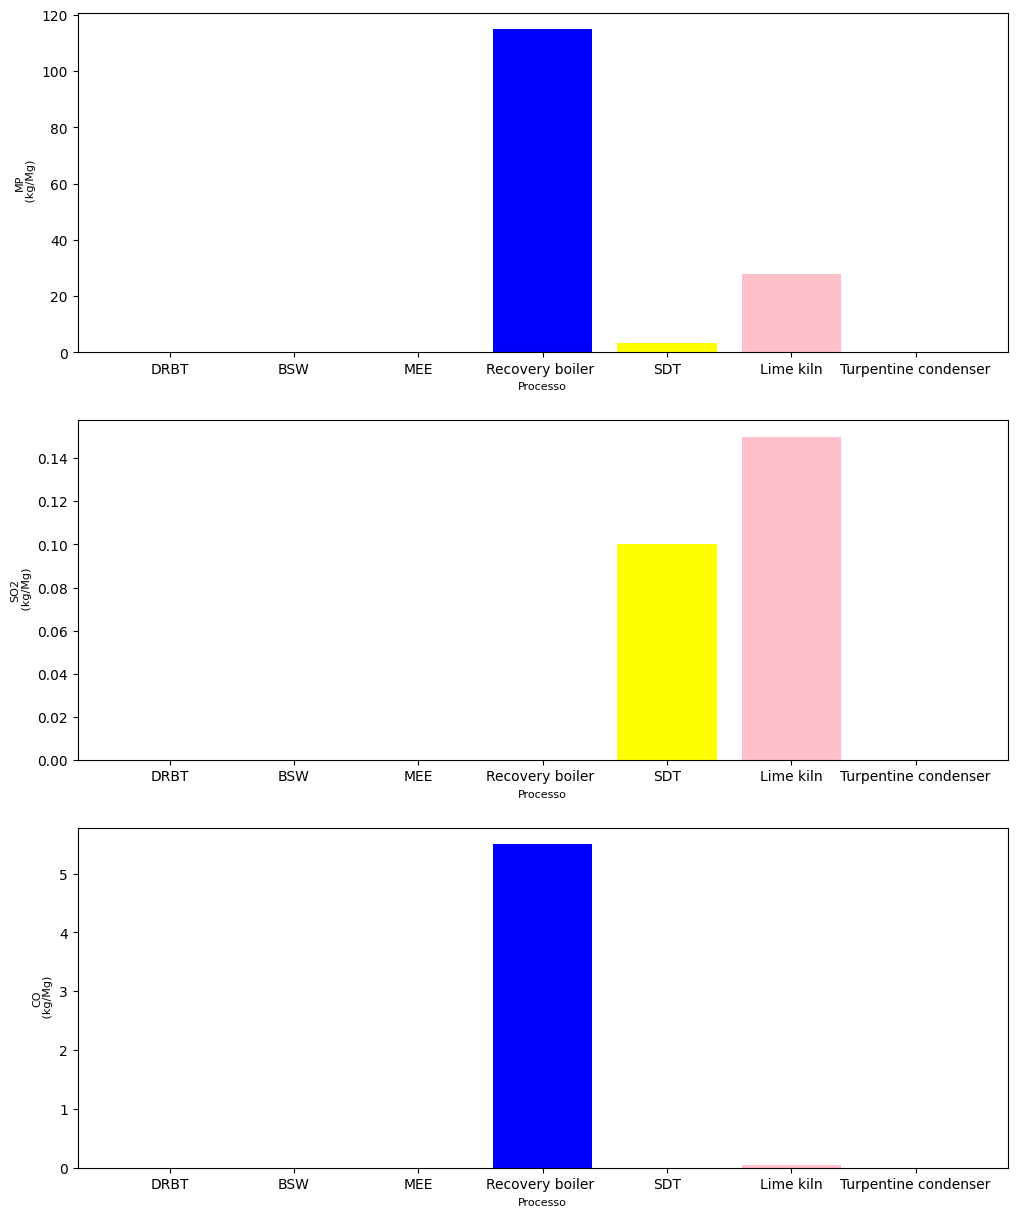

In [50]:
#plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 2025
emis = fe*atv

#somando dataframe
print(emis.sum())

#criando a figura com matplotlib
#criando subplots com numero de linhas igual ao numero de poluentes 
#sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,figsize=(12, 15))

#loop para reencher o subplot com os graficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii], color=['pink', 'violet','cyan','blue','yellow'])
    ax[ii-1].set_xlabel('Processo', fontsize = 8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)', fontsize = 8) 

#salvando a figura na pasta figures
#fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

## Criando Taxa de Atividade aleatória com sazonalidade
Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

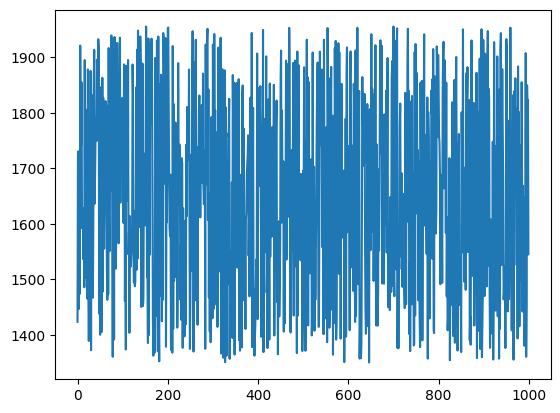

In [51]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 1350*1.45
atvMin = 1350
n = 1000
atv = (atvMax-atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [52]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia do Ano'] = df['Data'].dt.dayofyear  #criar um array de 1 a 365 e colocar igual a df['Dia']
# Mostrar o DataFrame resultante
print(df)

          Data  Mes  Dia do Ano
0   2024-01-01    1           1
1   2024-01-02    1           2
2   2024-01-03    1           3
3   2024-01-04    1           4
4   2024-01-05    1           5
..         ...  ...         ...
361 2024-12-27   12         362
362 2024-12-28   12         363
363 2024-12-29   12         364
364 2024-12-30   12         365
365 2024-12-31   12         366

[366 rows x 3 columns]


In [53]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
print(df)
df.to_csv(r"C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\FE\ativ.csv")


# Criando uma figura com os valores aleatórios
#fig, ax= plt.subplots()
#ax.plot(datas, atv)

          Data  Mes  Dia do Ano    atividade
0   2024-01-01    1           1  1647.759933
1   2024-01-02    1           2  1627.309364
2   2024-01-03    1           3  1861.177123
3   2024-01-04    1           4  1650.556317
4   2024-01-05    1           5  1524.425665
..         ...  ...         ...          ...
361 2024-12-27   12         362  1532.739439
362 2024-12-28   12         363  1687.640549
363 2024-12-29   12         364  1423.154592
364 2024-12-30   12         365  1879.134004
365 2024-12-31   12         366  1728.876464

[366 rows x 4 columns]


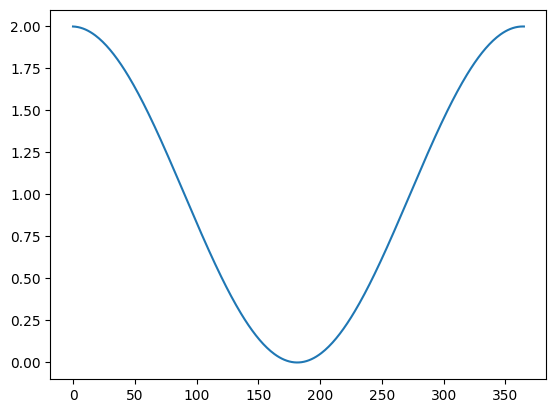

In [69]:
# Criando componente sazonal

sazonalidade = np.cos((2*np.pi)*df['Dia do Ano']/365)+1#taxa de papel produzido diariamente

df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\FE\ativ.csv")

500872.2930094864


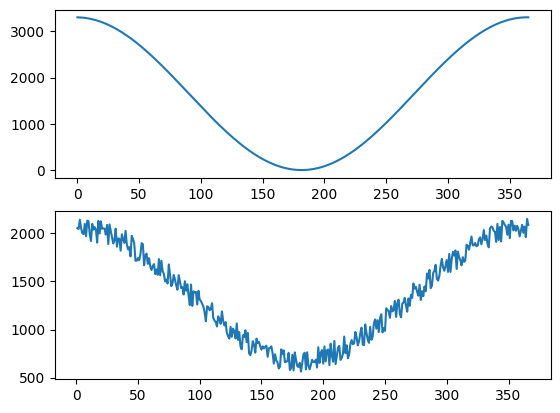

In [94]:
# Valores aleatórios com sazonalidade

#df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

df['aleatorioSazonal'] = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())*0.415


fig,ax= plt.subplots(2)

ax[1].plot(df['Dia do Ano'], df['aleatorioSazonal'])
ax[0].plot(df['sazonalidade']*df['atividade'].mean())
print(df['aleatorioSazonal'].mean()*365)

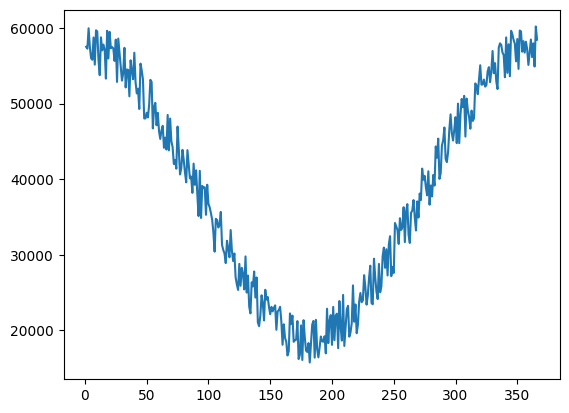

In [93]:
df['Lime Kiln_MP'] = df['aleatorioSazonal']*28.0
plt.plot(df['Dia do Ano'], df['Lime Kiln_MP'])